- Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import re 
import requests
from bs4 import BeautifulSoup

Web scraping using BeautifulSoup , Regex , Requests Libraries 

- "Code to extract mobile data from the Flipkart website."

In [67]:
Brand = []
RAM = []
ROM = []
MAH_BATTERY = []
Ratings = []
Rating = []
Size_of_Display = []
Reviews = []
Color = []
Camera = []
Warrenty = []
Price = []
Discount = [] 
Rear_01 = []
Rear_02 = []
Front_Camera = []

for i in range(1,50):
    url = f"https://www.flipkart.com/search?q=mobiles+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=price_desc&page={i}"
    page = requests.get(url)
    soup = BeautifulSoup(page.text) 



    for i in soup.find_all("div" , class_ = "yKfJKb row"): # Container 
        #print(i.text)
        text = i.text
        br = re.findall("^(.+?)(?=\s?\(|-)",text) # pattern for brand 
        if br:
            Brand.append(br[0])
    
        else:
            Brand.append(np.nan)
    
        ram = re.findall("(\d+.\w{2}).RAM",text) # pattern for ram 
        if ram:
            RAM.append(ram[0])
    
        else:
            RAM.append(np.nan)
    
        rom = re.findall("(\d+.\w{2}).ROM",text) # pattern for storage 
        if rom :
            ROM.append(rom[0])
    
        else:
            ROM.append(np.nan)
    
        mah = re.findall("(\d+.mAh).Battery",text) # pattern for Mah Battery 
        if mah:
            MAH_BATTERY.append(mah[0])
    
        else:
            MAH_BATTERY.append(np.nan)
    
        rat = re.findall("\)\d.\d(\d+,\d+).Ratings",text) # pattern for no of ratings 
        if rat:
            Ratings.append(rat[0])
    
        else:
            Ratings.append(np.nan)
    
        ra = re.findall("\)(\d.\d)",text) # pattern for rating 
        if ra:
            Rating.append(ra[0])
    
        else:
            Rating.append(np.nan)
    
        siz = re.findall("\)(\d.\d)",text) # pattern for size of sidplay 
        if siz:
            Size_of_Display.append(siz[0])
    
        else:
            Size_of_Display.append(np.nan)
    
        Rev = re.findall('(\d+).Reviews',text) # pattern for reviews 
        if Rev:
            Reviews.append(Rev[0])
    
        else:
            Reviews.append(np.nan)
    
        cl = re.findall("\((.+),.\d+.GB\)",text) # Pattern for color 
        if cl:
            Color.append(cl[0])
    
        else:
            Color.append(np.nan)
    
        cam = re.findall("Display(\d.+Camera)",text) # pattern for camera 
        if cam: 
            Camera.append(cam[0])
    
        else:
            Camera.append(np.nan)
    
        war = re.findall("\d.Year",text)  # pattern for warranty 
        if war:
            Warrenty.append(war[0])
    
        else:
            Warrenty.append(np.nan)
    
        price = re.findall("(₹\d+,\d+)₹",text) # Pattern for price
        if price:
            Price.append(price[0])
    
        else:
            Price.append(np.nan)
    
        dis = re.findall("(\d{2}.).off",text) # pattern for discount 
        if dis:
            Discount.append(dis[0])
    
        else:
            Discount.append(np.nan)

        r1 = re.findall("Display(\d+)MP",text) # pattern for rear_01 
        if r1:
            Rear_01.append(r1[0])

        else:
            Rear_01.append(np.nan)

        r2 = re.findall("Display\d+MP...(\d+)MP",text) # pattern for rear_02
        if r2:
            Rear_02.append(r2[0])

        else:
            Rear_02.append(np.nan)

        fc = re.findall("(\d+)MP.Front.Camera",text) #pattern for front camera 
        if fc:
            Front_Camera.append(fc[0])

        else:
            Front_Camera.append(np.nan)           

In [69]:
len(Brand)
len(RAM)
len(ROM)
len(MAH_BATTERY)
len(Ratings) 
len(Rating)
len(Size_of_Display)
len(Reviews)
len(Color) 
len(Camera) 
len(Warrenty)
len(Price) 
len(Discount) 
len(Rear_01) 
len(Rear_02) 
len(Front_Camera)

840

In [71]:
d = {"Brand":Brand ,"Color":Color ,"RAM": RAM ,"ROM": ROM, "mAh Battery":MAH_BATTERY, "Display_Size_Inch" : Size_of_Display , 
    "Total_Ratings" : Ratings ,"Rating" : Rating ,"N0_of_Reviews" :Reviews ,"Total_Camera_Resolution": Camera, "Price" : Price ,
    "Discount": Discount ,"Warrenty_in_Years": Warrenty, "Rear_01" :Rear_01 , "Rear_02": Rear_02 ,"Front_Camera" : Front_Camera }

In [73]:
df3 = pd.DataFrame(d) # Creating Dataframe 

In [75]:
df3.to_csv("Flipkart_Mobiles_DF")

# Importing Data 

In [7]:
df = pd.read_csv(r"Flipkart_Mobiles_DF")

In [9]:
df.head()

,Unnamed: 0,Brand,Color,RAM,ROM,mAh Battery,Display_Size_Inch,Total_Ratings,Rating,N0_of_Reviews,Total_Camera_Resolution,Price,Discount,Warrenty_in_Years,Rear_01,Rear_02,Front_Camera
0,0,MOTOROLA Edge 60 Pro,Pantone Sparkling Grape,8 GB,256 GB,6000 mAh,4.4,"4,063",4.4,448.0,50MP + 50MP + 10MP | 50MP Front Camera,"₹29,999",18%,1 Year,50.0,50.0,50.0
1,1,vivo V50 5G,Rose Red,8 GB,256 GB,6000 mAh,4.5,"4,605",4.5,442.0,50MP + 50MP | 50MP Front Camera,"₹36,999",13%,1 Year,50.0,50.0,50.0
2,2,realme 14 Pro+ 5G,Suede Grey,12 GB,512 GB,6000 mAh,4.4,"4,802",4.4,612.0,50MP + 50MP + 8MP | 32MP Front Camera,"₹37,999",95%,1 Year,50.0,50.0,32.0
3,3,realme GT 6,Fluid Silver,16 GB,512 GB,5500 mAh,4.5,"4,902",4.5,566.0,50MP + 8MP + 50MP | 32MP Front Camera,"₹36,999",28%,1 Year,50.0,8.0,32.0
4,4,Apple iPhone 13,Starlight,NaN,128 GB,NaN,4.6,NaN,4.6,907.0,12MP + 12MP | 12MP Front Camera,"₹44,999",09%,NaN,12.0,12.0,12.0


In [11]:
df = df.drop(columns = ["Total_Camera_Resolution", "Unnamed: 0"])
# Dropped Total_Camera_Resolution column beacuse i extracted three additinal Columns from it 

In [13]:
df.duplicated().sum() # Checking Duplicated Rows 

165

In [15]:
df = df.drop_duplicates() # Dropping Duplicated Roes 

In [17]:
df.duplicated().sum() 

0

In [19]:
df.shape # shape of the Data Frame

(675, 15)

In [21]:
df.columns # Columns of Data Frame

Index(['Brand', 'Color', 'RAM', 'ROM', 'mAh Battery', 'Display_Size_Inch',
       'Total_Ratings', 'Rating', 'N0_of_Reviews', 'Price', 'Discount',
       'Warrenty_in_Years', 'Rear_01', 'Rear_02', 'Front_Camera'],
      dtype='object')

In [23]:
df.dtypes # Data Types of Columns Before conversion 

Brand                 object
Color                 object
RAM                   object
ROM                   object
mAh Battery           object
Display_Size_Inch    float64
Total_Ratings         object
Rating               float64
N0_of_Reviews        float64
Price                 object
Discount              object
Warrenty_in_Years     object
Rear_01              float64
Rear_02              float64
Front_Camera         float64
dtype: object

In [25]:
df.info() # Information abount the Data Frame 

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 839
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              675 non-null    object 
 1   Color              675 non-null    object 
 2   RAM                615 non-null    object 
 3   ROM                675 non-null    object 
 4   mAh Battery        494 non-null    object 
 5   Display_Size_Inch  657 non-null    float64
 6   Total_Ratings      446 non-null    object 
 7   Rating             657 non-null    float64
 8   N0_of_Reviews      663 non-null    float64
 9   Price              607 non-null    object 
 10  Discount           604 non-null    object 
 11  Warrenty_in_Years  569 non-null    object 
 12  Rear_01            672 non-null    float64
 13  Rear_02            497 non-null    float64
 14  Front_Camera       566 non-null    float64
dtypes: float64(6), object(9)
memory usage: 84.4+ KB


# Replacing Special Characters & Renaming Columns 

In [28]:
df.head() #This returns the first 5 rows of the DataFrame by default.

,Brand,Color,RAM,ROM,mAh Battery,Display_Size_Inch,Total_Ratings,Rating,N0_of_Reviews,Price,Discount,Warrenty_in_Years,Rear_01,Rear_02,Front_Camera
0,MOTOROLA Edge 60 Pro,Pantone Sparkling Grape,8 GB,256 GB,6000 mAh,4.4,"4,063",4.4,448.0,"₹29,999",18%,1 Year,50.0,50.0,50.0
1,vivo V50 5G,Rose Red,8 GB,256 GB,6000 mAh,4.5,"4,605",4.5,442.0,"₹36,999",13%,1 Year,50.0,50.0,50.0
2,realme 14 Pro+ 5G,Suede Grey,12 GB,512 GB,6000 mAh,4.4,"4,802",4.4,612.0,"₹37,999",95%,1 Year,50.0,50.0,32.0
3,realme GT 6,Fluid Silver,16 GB,512 GB,5500 mAh,4.5,"4,902",4.5,566.0,"₹36,999",28%,1 Year,50.0,8.0,32.0
4,Apple iPhone 13,Starlight,NaN,128 GB,NaN,4.6,NaN,4.6,907.0,"₹44,999",09%,NaN,12.0,12.0,12.0


In [30]:
df = df.rename(columns = {"Discount" : "Discount_in_Percentage","ROM" : 'Storage',"Rear_01" : "Rear01_Camera_MP",
                          "Rear_02" : "Rear02_Camera_MP","Front_Camera" : "Front_Camera_MP"})
# Renamed the columns bases on the data stored in it 

In [32]:
df[['RAM','Storage','mAh Battery','Price','Discount_in_Percentage','Warrenty_in_Years','Total_Ratings']] = df[['RAM','Storage',
'mAh Battery','Price','Discount_in_Percentage','Warrenty_in_Years','Total_Ratings']].replace("[^0-9]","",regex = True)

df['Color'] = df['Color'].replace([".+\("],"",regex = True)
df['Color'] = df['Color'].replace("(PRODUCT)","",regex = True)
df['Color'] = df['Color'].replace(["(,/,?,)"],"").replace(["/ Black"],"",regex = True).replace("[()]","",regex = True)

# Replaced all the Letter and Special Charaters Using Regex and Replace Function only performed on Continous Variables 

# Handling Missing Values 

In [35]:
df.isna().sum()  # (or) df.isnull().sum()

Brand                       0
Color                       0
RAM                        60
Storage                     0
mAh Battery               181
Display_Size_Inch          18
Total_Ratings             229
Rating                     18
N0_of_Reviews              12
Price                      68
Discount_in_Percentage     71
Warrenty_in_Years         106
Rear01_Camera_MP            3
Rear02_Camera_MP          178
Front_Camera_MP           109
dtype: int64

In [37]:
for i in ['RAM','mAh Battery','Display_Size_Inch','Total_Ratings','Rating','N0_of_Reviews','Discount_in_Percentage','Warrenty_in_Years']:
    df[i] = df[i].fillna(0).astype(int)
#Filled nan vailues of RAM , mAh_Battery , Display_size_inch, total_ratings,rating,no_of reviews , discount in percentage ,Warrenty_in_Years columns by 0

In [39]:
for i in ['Rear01_Camera_MP','Rear02_Camera_MP','Front_Camera_MP']:
    df[i] = df[i].fillna('0').astype('int')

# filled nan values of Rear01_Camera_MP,Rear02_Camera_MP,Front_Camera_MP columns by 0 

In [41]:
df.isnull().sum() # Checking nan values 

Brand                      0
Color                      0
RAM                        0
Storage                    0
mAh Battery                0
Display_Size_Inch          0
Total_Ratings              0
Rating                     0
N0_of_Reviews              0
Price                     68
Discount_in_Percentage     0
Warrenty_in_Years          0
Rear01_Camera_MP           0
Rear02_Camera_MP           0
Front_Camera_MP            0
dtype: int64

In [43]:
df['Price'] = df['Price'].fillna(df['Price'].median()) # filling nan values of price by using Median Value of Price column 

In [45]:
df['Price'] = df['Price'].astype('int') # conversion type of Price column Object to int 

In [47]:
df.isna().sum() #Checking nan values 

Brand                     0
Color                     0
RAM                       0
Storage                   0
mAh Battery               0
Display_Size_Inch         0
Total_Ratings             0
Rating                    0
N0_of_Reviews             0
Price                     0
Discount_in_Percentage    0
Warrenty_in_Years         0
Rear01_Camera_MP          0
Rear02_Camera_MP          0
Front_Camera_MP           0
dtype: int64

In [49]:
df['Brand_Name'] = df['Brand'].str.split(" ", expand = True ).iloc[:,0] 

In [51]:
df['Model'] = df['Brand'].str.split(" ",expand = True)[1] + " " + df['Brand'].str.split(" ", expand = True)[2]

**extracted two columns (Brand_Name, Model) from a Brand column, Brand column has combined values like "Samsung Galaxy S21" or "Apple iPhone 13"**

In [54]:
df2 = df.copy() # copied data frame to df2 

In [56]:
df2 = df2.rename(columns = {'mAh Battery' : "mAh_Battery"}) 
# renamed column mAh Battery to mAh_Battery

In [58]:
d = {"Brand_Name" : df2['Brand_Name'] ,
     "Model" : df2['Model'] ,
     "Color" :df2['Color'] ,
     "RAM" : df2['RAM'] ,
     "Storage" : df2['Storage'] ,
     "mAh_Battery": df2['mAh_Battery'] ,
     "Display_Size_Inch" : df2['Display_Size_Inch'] ,
     "No_Of_Ratings" : df2['Total_Ratings'] ,
     "Rating" :df2['Rating'], 
     "N0_of_Reviews" :df2['N0_of_Reviews'] ,
     "Price" : df2['Price'],
    "Discount_in_Percentage" : df2['Discount_in_Percentage'] ,
     "Warrenty_in_Years" : df2['Warrenty_in_Years'] ,
     "Rear01_Camera_MP" : df2['Rear01_Camera_MP'],
    "Rear02_Camera_MP" : df2['Rear02_Camera_MP'] , 
     "Front_Camera_MP" : df2['Front_Camera_MP']}

# Created a data frame orderly which makes easy to understand the Brand , Model and Price of a Mobiles

In [60]:
df2 = pd.DataFrame(d) 

# Copied Created Data Frame into df2

In [62]:
df2.isna().sum() # Checking Nan values after extracted data from Brand 

Brand_Name                 0
Model                     64
Color                      0
RAM                        0
Storage                    0
mAh_Battery                0
Display_Size_Inch          0
No_Of_Ratings              0
Rating                     0
N0_of_Reviews              0
Price                      0
Discount_in_Percentage     0
Warrenty_in_Years          0
Rear01_Camera_MP           0
Rear02_Camera_MP           0
Front_Camera_MP            0
dtype: int64

In [167]:
df2

,Brand_Name,Model,Color,RAM,Storage,mAh_Battery,Display_Size_Inch,No_Of_Ratings,Rating,N0_of_Reviews,Price,Discount_in_Percentage,Warrenty_in_Years,Rear01_Camera_MP,Rear02_Camera_MP,Front_Camera_MP
0,Motorola,Edge 60,Red,8,256,6000,4,4063,4,448,29999,18,1,50,50,50
1,Vivo,V50 5g,Grey,8,256,6000,4,4605,4,442,36999,13,1,50,50,50
2,Realme,14 pro+,Silver,12,512,6000,4,4802,4,612,37999,95,1,50,50,32
3,Realme,Gt 6,Starlight,16,512,5500,4,4902,4,566,36999,28,1,50,8,32
4,Apple,Iphone 13,Violet,0,128,0,4,0,4,907,44999,9,0,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Samsung,Galaxy a35,Silver,8,128,5000,4,11564,4,825,22999,32,1,50,8,13
836,Vivo,Y300 5g,Titanium,8,256,5000,4,2325,4,151,22999,20,1,50,2,32
837,Motorola,Edge 40,Titan,8,128,5000,4,59816,4,72,22999,17,1,50,13,32
838,Vivo,T3 pro,Black,8,128,5500,4,75496,4,878,22999,23,1,50,8,16


In [64]:
df2['Model'] = df2['Model'].fillna('Unknown') # Filling Nan values in model column with 'Unknown'

In [66]:
df2['Brand_Name'].unique()  # Priting Unique values in Brand_Name Column

array(['MOTOROLA', 'vivo', 'realme', 'Apple', 'SAMSUNG', 'OnePlus',
       'IQOO', 'OPPO', '13', 'Motorola', 'Google', 'REDMI', 'Xiaomi',
       'POCO', 'Honor', 'Cubot', 'ASUS', 'Samsung', 'Infinix', 'LG',
       'Tecno', 'Nothing', 'Redmi', 'Nokia', 'BlackBerry', 'Mi', '11'],
      dtype=object)

In [68]:
df2['Brand_Name'] = df2['Brand_Name'].str.capitalize() # Capitalizing First Latter Of Each Word 

In [70]:
df2['Brand_Name'] = df2['Brand_Name'].replace({'13' : np.nan, '11' : np.nan}) 
# Brand name which has nuerical values replacing with nan values by using Numpy Librery 

In [72]:
df2['Brand_Name'].unique() # Priting Unique values in Brand_Name Column after replacing Numerical Values 

array(['Motorola', 'Vivo', 'Realme', 'Apple', 'Samsung', 'Oneplus',
       'Iqoo', 'Oppo', nan, 'Google', 'Redmi', 'Xiaomi', 'Poco', 'Honor',
       'Cubot', 'Asus', 'Infinix', 'Lg', 'Tecno', 'Nothing', 'Nokia',
       'Blackberry', 'Mi'], dtype=object)

In [74]:
df2['Brand_Name'] = df2['Brand_Name'].fillna('Unknown') # Filling nan values in brand name column with 'Unknown'

In [76]:
df2['Brand_Name'].unique() # After filling nan values in brand name column printing unique values 

array(['Motorola', 'Vivo', 'Realme', 'Apple', 'Samsung', 'Oneplus',
       'Iqoo', 'Oppo', 'Unknown', 'Google', 'Redmi', 'Xiaomi', 'Poco',
       'Honor', 'Cubot', 'Asus', 'Infinix', 'Lg', 'Tecno', 'Nothing',
       'Nokia', 'Blackberry', 'Mi'], dtype=object)

In [78]:
df2['Model'] = df2['Model'].str.capitalize() # Capitalizing first latter from every word in Model column

In [80]:
df2['Color'].nunique() # Printing No of unique values in color column 

317

In [82]:
# To reduce the cardinality of the Color column (e.g., mapping "Dark Black" to "Black")
a = []

for i in df['Color']:
    if "Graphite" in i:
        a.append("Graphite")
    if "Red" in i:
        a.append("Red")

    if "Grey" in i:
        a.append("Grey")

    if "Blue" in i:
        a.append("Blue")

    if "Silver" in i:
        a.append("Silver")
    if "Lavender" in i:
        a.append("Lavender")

    if "Astral Trail" in i:
        a.append("Astral Trail")

    if "Starlight" in i:
        a.append("Starlight")

    if "Violet" in i:
        a.append("Violet")

    if "White" in i:
        a.append("White")

    if "Noir" in i:
        a.append("Noir")

    if "Green" in i:
        a.append("Green")

    if "Starry Night" in i :
        a.append("Starry Night")

    if "Wood" in i:
        a.append("Wood")

    if "Olive" in i:
        a.append("Olive")

    if "Black" in i:
        a.append("Black")

    if "Midnight" in i:
        a.append("Midnight")

    if "Navy" in i:
        a.append("Navy")

    if "Mint" in i:
        a.append("Mint")
    if "Iris" in i:
        a.append("Iris")

    if "Obsidian" in i:
        a.append("Obsidian")

    if "Teal" in i:
        a.append("Teal")

    if "Pink" in i:
        a.append("Pink")

    if "Ocean" in i:
        a.append("Ocean")

    if "Cream" in i:
        a.append("Cream")
    if "Porcelain" in i:
        a.append("Porcelain")

    if "Legend" in i:
        a.append("Legend")

    if "Ultramarine" in i:
        a.append("Ultramarine")

    if "Titanium" in i:
        a.append("Titanium")

    if "Lime" in i:
        a.append("Lime")

    if "Yellow" in i:
        a.append("Yellow")

    if "Alpha" in i:
        a.append("Alpha")

    if "Peach Fuzz" in i:
        a.append("Peach Fuzz")

    if "Aloe" in i:
        a.append("Aloe")

    if "Purple" in i:
        a.append("Purple")

    if "Orange" in i:
        a.append("Orange")

    if "Beach Sand" in i:
        a.append("Beach Sand")

    if "Gold" in i:
        a.append("Gold")

    if "Brown" in i:
        a.append("Brown")
 
    if "Ocean" in i:
        a.append("Ocean")

    if "PANTONE" in i:
        a.append("PANTONE")

    if "Lilac" in i:
        a.append("Lilac")
    if "Titan" in i:
        a.append("Titan")

    if "Sunrise" in i:
        a.append("Sunrise")

    if "Bronze" in i:
        a.append("Bronze")

    if "Fantasy" in i:
        a.append("Fantasy")

    if "Chalk" in i:
        a.append("Chalk")

    if "Peony" in i:
        a.append("Peony")

    if "Pacific Pearl" in i:
        a.append("Pacific Pearl")

    if "Lemongrass" in i:
        a.append("Lemongrass")

    if "Apricot Crush" in i:
        a.append("Apricot Crush")

In [84]:
len(a) # Total No of rows in color column 

675

In [86]:
df2['Color'] = a # Appending all the colors extracted into df2['color']

In [88]:
df2['Color'].unique() # Printing unique values in color column 

array(['Red', 'Grey', 'Silver', 'Starlight', 'Violet', 'Green',
       'Astral Trail', 'White', 'Titanium', 'Titan', 'Midnight', 'Noir',
       'Pink', 'Legend', 'Alpha', 'Blue', 'Navy', 'Lavender', 'Black',
       'Starry Night', 'Graphite', 'Wood', 'Obsidian', 'Mint',
       'Ultramarine', 'Olive', 'Porcelain', 'Teal', 'Iris', 'Yellow',
       'Cream', 'Aloe', 'Purple', 'Lime', 'Ocean', 'Gold', 'Peony',
       'Orange', 'PANTONE', 'Peach Fuzz', 'Chalk', 'Brown', 'Lemongrass',
       'Sunrise', 'Bronze', 'Pacific Pearl', 'Apricot Crush', 'Lilac',
       'Fantasy'], dtype=object)

In [90]:
df2['Color'].nunique() # no of unique values reduces to 317 to 49

49

In [92]:
df2

,Brand_Name,Model,Color,RAM,Storage,mAh_Battery,Display_Size_Inch,No_Of_Ratings,Rating,N0_of_Reviews,Price,Discount_in_Percentage,Warrenty_in_Years,Rear01_Camera_MP,Rear02_Camera_MP,Front_Camera_MP
0,Motorola,Edge 60,Red,8,256,6000,4,4063,4,448,29999,18,1,50,50,50
1,Vivo,V50 5g,Grey,8,256,6000,4,4605,4,442,36999,13,1,50,50,50
2,Realme,14 pro+,Silver,12,512,6000,4,4802,4,612,37999,95,1,50,50,32
3,Realme,Gt 6,Starlight,16,512,5500,4,4902,4,566,36999,28,1,50,8,32
4,Apple,Iphone 13,Violet,0,128,0,4,0,4,907,44999,9,0,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Samsung,Galaxy a35,Silver,8,128,5000,4,11564,4,825,22999,32,1,50,8,13
836,Vivo,Y300 5g,Titanium,8,256,5000,4,2325,4,151,22999,20,1,50,2,32
837,Motorola,Edge 40,Titan,8,128,5000,4,59816,4,72,22999,17,1,50,13,32
838,Vivo,T3 pro,Black,8,128,5500,4,75496,4,878,22999,23,1,50,8,16


In [94]:
# df2 = df2.drop(df2[(df2['Brand_Name'] == 'Unknown') & (df2['Model'] == 'Unknown')].index)

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand_Name              675 non-null    object
 1   Model                   675 non-null    object
 2   Color                   675 non-null    object
 3   RAM                     675 non-null    int32 
 4   Storage                 675 non-null    object
 5   mAh_Battery             675 non-null    int32 
 6   Display_Size_Inch       675 non-null    int32 
 7   No_Of_Ratings           675 non-null    int32 
 8   Rating                  675 non-null    int32 
 9   N0_of_Reviews           675 non-null    int32 
 10  Price                   675 non-null    int32 
 11  Discount_in_Percentage  675 non-null    int32 
 12  Warrenty_in_Years       675 non-null    int32 
 13  Rear01_Camera_MP        675 non-null    int32 
 14  Rear02_Camera_MP        675 non-null    int32 
 15  Front_Camer

In [98]:
df2['Storage'] = df2['Storage'].astype('int') # conversion type of storage column object to int 

In [100]:
df2.info() # Information of data after making all the changes from raw data 

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand_Name              675 non-null    object
 1   Model                   675 non-null    object
 2   Color                   675 non-null    object
 3   RAM                     675 non-null    int32 
 4   Storage                 675 non-null    int32 
 5   mAh_Battery             675 non-null    int32 
 6   Display_Size_Inch       675 non-null    int32 
 7   No_Of_Ratings           675 non-null    int32 
 8   Rating                  675 non-null    int32 
 9   N0_of_Reviews           675 non-null    int32 
 10  Price                   675 non-null    int32 
 11  Discount_in_Percentage  675 non-null    int32 
 12  Warrenty_in_Years       675 non-null    int32 
 13  Rear01_Camera_MP        675 non-null    int32 
 14  Rear02_Camera_MP        675 non-null    int32 
 15  Front_Camer

# Data Visualizaion

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Non - Visualization 

In [106]:
df2['Price'].describe()
# describing about the price column 

count      675.000000
mean     36659.634074
std      14541.477624
min      22999.000000
25%      25999.000000
50%      30999.000000
75%      42999.000000
max      91490.000000
Name: Price, dtype: float64

In [108]:
# Range of Price 
min = df2["Price"].min()
max = df2["Price"].max()
range = max - min 
print(range)

68491


In [110]:
df2.describe()
# Describing about the continous Columns in the data frame 

,RAM,Storage,mAh_Battery,Display_Size_Inch,No_Of_Ratings,Rating,N0_of_Reviews,Price,Discount_in_Percentage,Warrenty_in_Years,Rear01_Camera_MP,Rear02_Camera_MP,Front_Camera_MP
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,8.509630,232.699259,3797.871111,13.906667,11451.445926,13.906667,341.914074,36659.634074,28.770370,0.848889,55.983704,13.182222,20.577778
std,3.480912,115.419541,2380.739836,66.689892,20934.368750,66.689892,305.214929,14541.477624,27.904814,0.374615,29.902284,16.522109,15.769137
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,128.000000,0.000000,4.000000,0.000000,4.000000,84.000000,25999.000000,12.000000,1.000000,50.000000,0.000000,12.000000
50%,8.000000,256.000000,5000.000000,4.000000,3191.000000,4.000000,249.000000,30999.000000,20.000000,1.000000,50.000000,8.000000,16.000000
75%,12.000000,256.000000,5400.000000,4.000000,11564.000000,4.000000,585.000000,42999.000000,32.000000,1.000000,50.000000,12.000000,32.000000
max,16.000000,512.000000,10200.000000,494.000000,98184.000000,494.000000,998.000000,91490.000000,99.000000,2.000000,200.000000,64.000000,60.000000


In [112]:
# Identifying Outliers-- Non visualization

q1 = df2['Price'].quantile(0.25) # 25 percentile of price column 
q3 = df2['Price'].quantile(0.75) # 75 percentile of Price column 
min_val = df2['Price'].min() # min value of Price column 
max_val = df2['Price'].max() # max value of Price column 

IQR = q3 - q1  # the difference between 75 and 25 percentiles 

# Calculating lower and upper limits 
lower_limit = np.max((min_val, q1 - 1.5 * IQR))
upper_limit = np.min((max_val, q3 + 1.5 * IQR))

outliers = df2[(df2['Price'] < lower_limit) | (df2['Price'] > upper_limit)]

outliers 


,Brand_Name,Model,Color,RAM,Storage,mAh_Battery,Display_Size_Inch,No_Of_Ratings,Rating,N0_of_Reviews,Price,Discount_in_Percentage,Warrenty_in_Years,Rear01_Camera_MP,Rear02_Camera_MP,Front_Camera_MP
41,Apple,Iphone 16,Blue,0,128,0,4,16639,4,704,69999,12,0,48,12,12
46,Apple,Iphone 16,Mint,0,256,0,4,16639,4,704,79999,11,0,48,12,12
54,Apple,Iphone 16,Blue,0,256,0,4,16639,4,704,79999,11,0,48,12,12
57,Apple,Iphone 16,Porcelain,0,256,0,4,2461,4,148,89999,9,0,48,12,12
64,Apple,Iphone 16,Teal,0,256,0,4,16639,4,704,79999,11,0,48,12,12
65,Apple,Iphone 16,White,0,128,0,4,16639,4,704,69999,12,0,48,12,12
70,Apple,Iphone 16,Pink,0,256,0,4,16639,4,704,79999,11,0,48,12,12
73,Apple,Iphone 16,Ultramarine,0,128,0,4,2461,4,148,79999,11,0,48,12,12
74,Apple,Iphone 16,White,0,256,0,4,16639,4,704,79999,11,0,48,12,12
75,Apple,Iphone 16,Pink,0,256,0,4,2461,4,148,89999,9,0,48,12,12


In [115]:
def analyze_categorical(col):

    unique_values = df2[col].unique()
    no_unique_values = df2[col].nunique()
    frequency = df2[col].value_counts()
    mode = df2[col].mode()


    print(f"The Unique Values in {col} are : \n",unique_values )
    print()
    print(f'The No of Unique Values in {col} is : \n',no_unique_values)
    print()
    print(f'The Value Counts of {col} is : \n' , frequency)
    print()
    print(f'The Most in repeated {col} in {col} is : \n',mode)

**Above code performs analysis  on caegorical data by printing uniques values , n of unique values , value counts and mode of categorical column**

In [118]:
analyze_categorical('Brand_Name')

The Unique Values in Brand_Name are : 
 ['Motorola' 'Vivo' 'Realme' 'Apple' 'Samsung' 'Oneplus' 'Iqoo' 'Oppo'
 'Unknown' 'Google' 'Redmi' 'Xiaomi' 'Poco' 'Honor' 'Cubot' 'Asus'
 'Infinix' 'Lg' 'Tecno' 'Nothing' 'Nokia' 'Blackberry' 'Mi']

The No of Unique Values in Brand_Name is : 
 23

The Value Counts of Brand_Name is : 
 Brand_Name
Samsung       135
Realme        101
Vivo           94
Apple          60
Redmi          51
Oneplus        40
Motorola       32
Oppo           32
Iqoo           23
Poco           23
Xiaomi         19
Google         19
Nothing        15
Infinix        13
Honor           5
Tecno           4
Unknown         2
Mi              2
Cubot           1
Asus            1
Lg              1
Nokia           1
Blackberry      1
Name: count, dtype: int64

The Most in repeated Brand_Name in Brand_Name is : 
 0    Samsung
Name: Brand_Name, dtype: object


In [120]:
analyze_categorical('Model')

The Unique Values in Model are : 
 ['Edge 60' 'V50 5g' '14 pro+' 'Gt 6' 'Iphone 13' 'Galaxy s24+' 'T3 ultra'
 '13r 5g' 'Iphone 15' '12 5g' 'Reno13 5g' 'Galaxy s25' 'V40 pro'
 'Galaxy a36' 'Unknown' 'Iphone 14' 'Galaxy a56' 'Edge 50' 'V30 pro'
 'Iphone 16e' 'Pixel 8a' '14 civi' 'Iphone 16' 'Galaxy s24' 'Pixel 9a'
 'F6 5g' 'Neo9 pro' 'Galaxy s21' 'Galaxy s23' 'Galaxy z' '10 pro'
 'Galaxy a54' 'V30 5g' '200 pro' 'Galaxy f56' 'V23 pro' 'V40 5g' 'X200 5g'
 '13 5g' 'X80 pro' 'Pixel 9' 'F4 5g' 'Gt 6t' 'F5 5g' 'Find n3'
 'Galaxy s22' 'Galaxy s20' 'Find x8' 'X100 pro' 'Iphone 12' 'Galaxy s9'
 'Gt 7' 'Razar 50' 'X90 pro' 'Kingkong x' 'Rog phone' 'Reno10 pro+'
 'Iphone se' '9 pro' 'Iphone xr' 'Reno13 pro' 'Razr 60' 'Iphone 8'
 'Iphone 11' 'X50 pro' 'Gt 7t' '9t 5g' 'V25 pro' 'Zero flip' 'Pixel 7'
 'Pixel 8' 'Razr 40' '7t pro' 'Pixel 6a' '11r 5g' 'Gt neo' 'Iphone 7'
 'G pro' 'Galaxy a73' '12 pro' 'Neo 9' 'Reno 12' '9rt 5g' 'Camon 30'
 '10r 5g' 'V29 pro' 'Reno8t 5g' '11 5g' 'Galaxy a55' 'V27 5g' 'Re

In [122]:
analyze_categorical('Color')

The Unique Values in Color are : 
 ['Red' 'Grey' 'Silver' 'Starlight' 'Violet' 'Green' 'Astral Trail' 'White'
 'Titanium' 'Titan' 'Midnight' 'Noir' 'Pink' 'Legend' 'Alpha' 'Blue'
 'Navy' 'Lavender' 'Black' 'Starry Night' 'Graphite' 'Wood' 'Obsidian'
 'Mint' 'Ultramarine' 'Olive' 'Porcelain' 'Teal' 'Iris' 'Yellow' 'Cream'
 'Aloe' 'Purple' 'Lime' 'Ocean' 'Gold' 'Peony' 'Orange' 'PANTONE'
 'Peach Fuzz' 'Chalk' 'Brown' 'Lemongrass' 'Sunrise' 'Bronze'
 'Pacific Pearl' 'Apricot Crush' 'Lilac' 'Fantasy']

The No of Unique Values in Color is : 
 49

The Value Counts of Color is : 
 Color
Black            136
Blue              86
Green             62
White             43
Purple            32
Grey              30
Titan             26
Silver            24
Gold              22
Titanium          17
Midnight          14
Navy              13
Red               13
Pink              10
Violet            10
PANTONE           10
Mint               9
Yellow             9
Graphite           9
Obsidian      

## Univariate Analysis

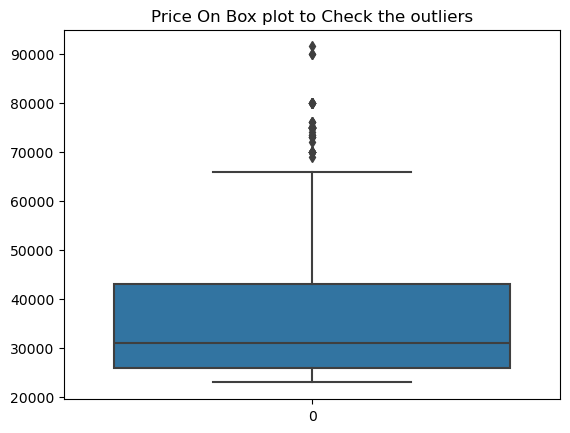

In [125]:
# univariate box plot to check the outliers on the continoues columns 
sns.boxplot(data = df2['Price'])
plt.title("Price On Box plot to Check the outliers")
plt.xlabel = 'Price'
plt.ylabel = 'Outliers'
plt.show()

**Insights : Above Box plot confirms that Price column has Out liers**

TypeError: 'str' object is not callable

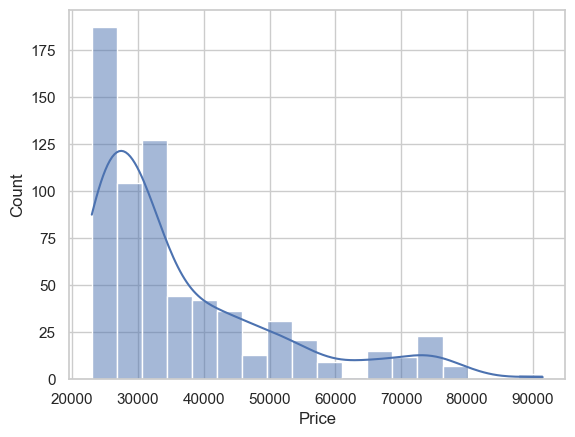

In [179]:
# hist plot to aalyse the frequency of continoues coulums 
sns.set(style = 'whitegrid')
sns.histplot(data = df2 , x = 'Price', kde = True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Frequency of prices Available')
plt.show()

**1. Rigth skewed Distribution most of the prices are lower and fewer models at higher prices**

**2. Most of the mobile prices Rangeing between 25000 to 35000** 

Text(0.5, 1.0, 'Density of Prices')

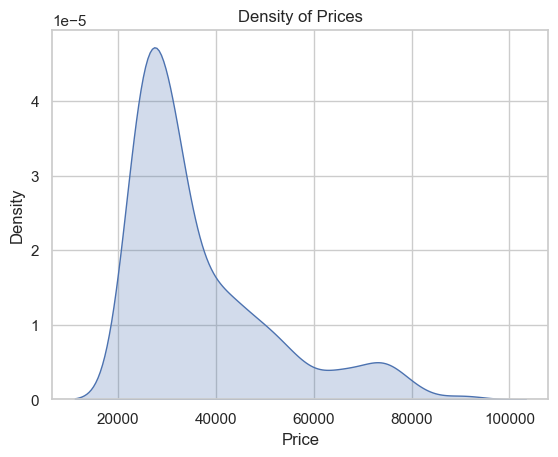

In [182]:
sns.kdeplot(data = df2 , x = 'Price', fill = True)
plt.title('Density of Prices')

1. Skewness : The plot is right-skewed (positively skewed) Most values are concentrated on the lower end, and the tail extends toward higher prices.
2. The curve peaks sharply between ₹20,000 and ₹30,000, suggesting most mobile phones fall in this price range.

TypeError: 'str' object is not callable

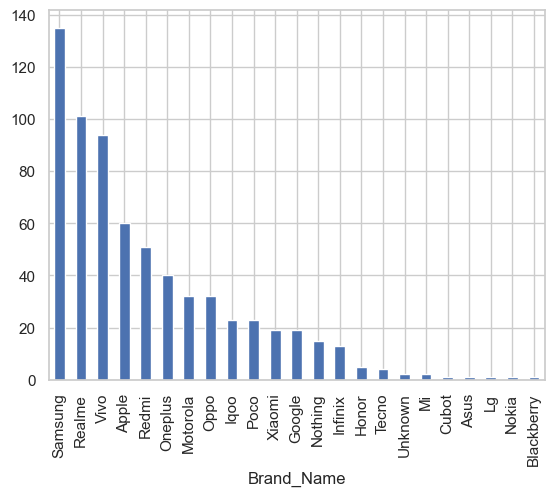

In [185]:
#categorical Data 
sns.set(style = 'whitegrid')
df2['Brand_Name'].value_counts().plot(kind = "bar")
plt.xlabel("Brands")
plt.ylabel("Frequency")
plt.title("Frequency of Brands")
plt.show()

1. Top Brands by Count: Samsung is the most frequent brand (~135 entries) Followed by Realme, Vivo, and Apple
2. Redmi, OnePlus, and Motorola also have a significant presence.
3. Low Frequency Brands: Brands like Blackberry, Nokia, LG, Asus, Cubot, and Mi have very few entries.The Unknown category may indicate missing or unclear brand data.

In [188]:
# df2['Brand_Name'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

TypeError: 'str' object is not callable

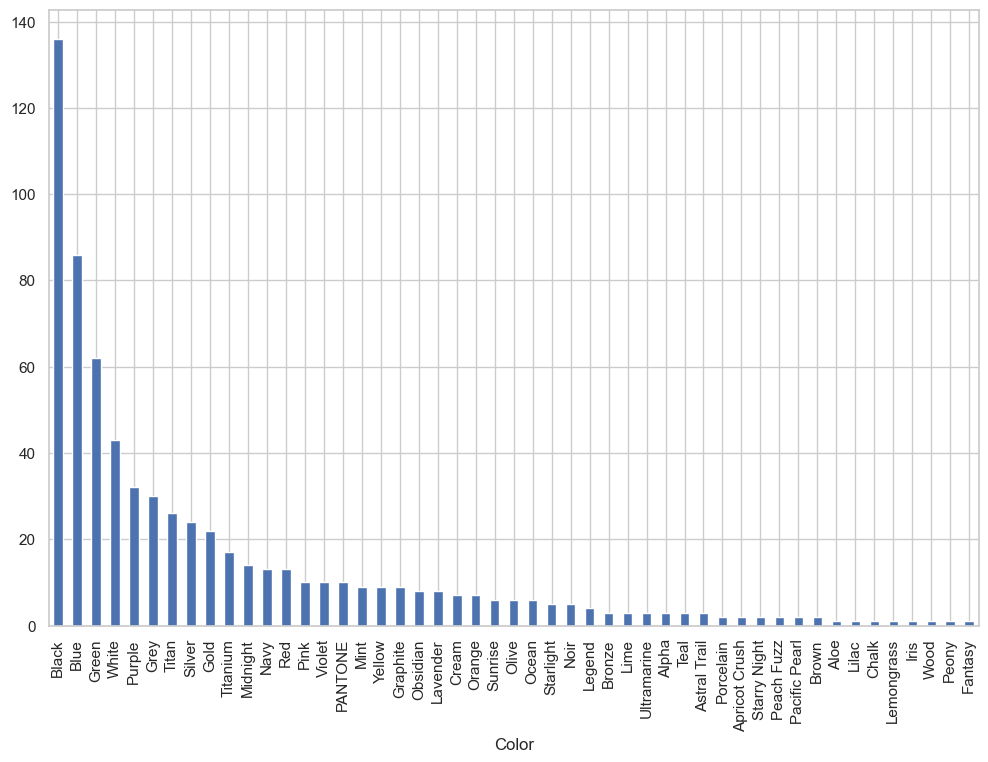

In [191]:
sns.set(style = 'whitegrid')
plt.figure(figsize= (12,8))
df2['Color'].value_counts().plot(kind = "bar")
plt.xlabel("Brands")
plt.ylabel("Frequency")
plt.title("Frequency of Brands")
plt.xticks(rotation = 90)
plt.show()

1. Top 5 Most Common Colors: Black (most dominant) , Blue ,Green , White , Purple

TypeError: 'str' object is not callable

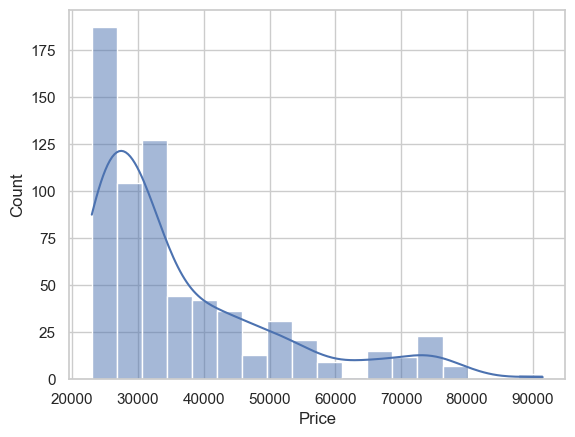

In [193]:
sns.histplot(data = df2 , x = 'Price', kde = True)
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title("Distribution Of Mobile Prices Available in Flipkart")
plt.show()

In [195]:
# Categorical + Numerical 
Avg_Price_for_Brand = df2.groupby('Brand_Name')[['Price','No_Of_Ratings']].mean().sort_values(by = 'Price', ascending = True)

In [197]:
Avg_Price_for_Brand

,Price,No_Of_Ratings
Brand_Name,,
Mi,24494.500000,5090.000000
Nothing,27465.666667,47595.933333
Redmi,28009.607843,10769.607843
Poco,28085.956522,9376.217391
Blackberry,28699.000000,0.000000
Infinix,28999.000000,5387.769231
Realme,29546.128713,16394.138614
Nokia,30999.000000,8980.000000
Asus,30999.000000,0.000000


<Axes: xlabel='Brand_Name'>

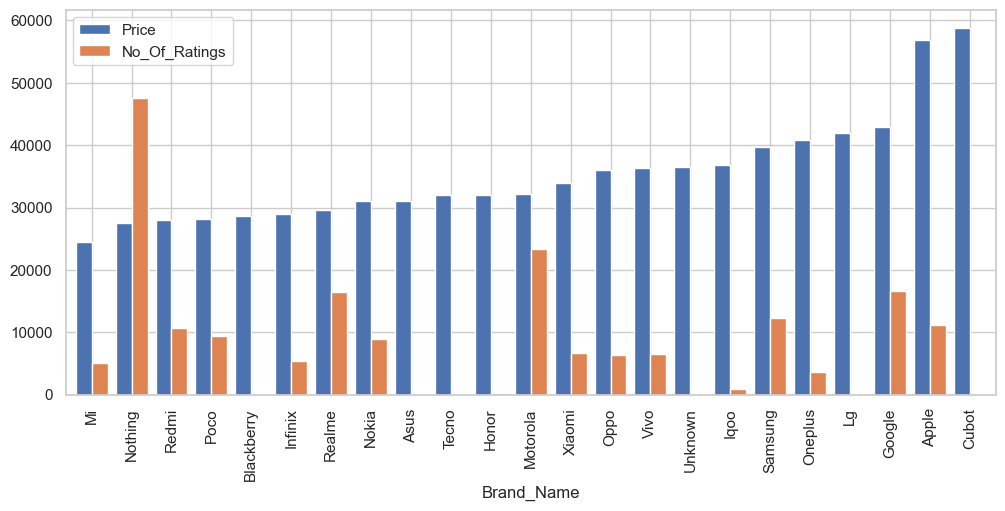

In [199]:
Avg_Price_for_Brand.plot(kind = 'bar', figsize = (12,5), width = 0.8)

Interpretation of the Grouped Bar Plot: Brand vs. Price & No_Of_Ratings This grouped bar chart compares mobile brands across two metrics:

Average Price (blue bars)

Average Number of Ratings (orange bars)
1. High Price Brands: Cubot, Apple, and Google have the highest average prices. These brands are likely targeting the premium smartphone market.
2. Most Rated Brands: Nothing stands out with an exceptionally high number of ratings, despite a moderate price — possibly indicating popularity or a viral model.Motorola and Google also show strong engagement.

In [202]:
describe_on_Brand = df2.groupby('Brand_Name')[['Price','mAh_Battery','No_Of_Ratings','N0_of_Reviews']].agg('mean','median','min','max').sort_values(by = 'Price', ascending = True)

In [204]:
describe_on_Brand

,Price,mAh_Battery,No_Of_Ratings,N0_of_Reviews
Brand_Name,,,,
Mi,24494.500000,0.000000,5090.000000,597.000000
Nothing,27465.666667,5000.000000,47595.933333,769.333333
Redmi,28009.607843,4578.039216,10769.607843,392.980392
Poco,28085.956522,4769.565217,9376.217391,602.304348
Blackberry,28699.000000,3505.000000,0.000000,2.000000
Infinix,28999.000000,1538.461538,5387.769231,290.153846
Realme,29546.128713,4488.316832,16394.138614,321.455446
Nokia,30999.000000,3500.000000,8980.000000,395.000000
Asus,30999.000000,0.000000,0.000000,781.000000


<Axes: xlabel='Brand_Name'>

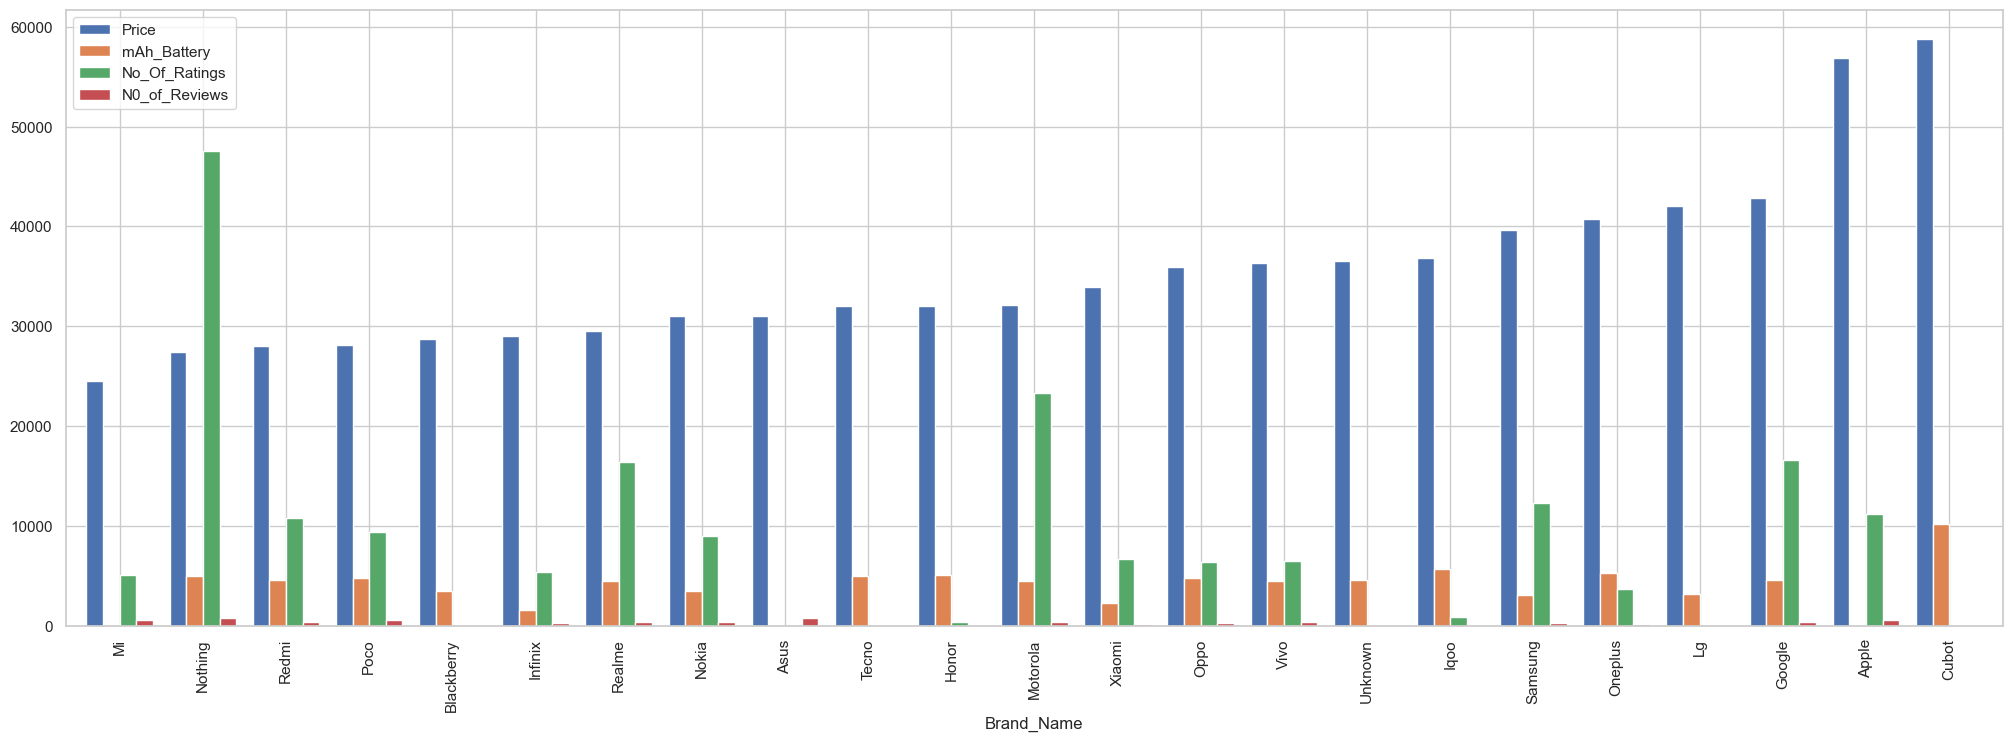

In [206]:
describe_on_Brand.plot(kind = 'bar',figsize = (25 ,8), width = 0.8)

Interpretation of the Grouped Bar Plot: Brand vs. Price, Battery, Ratings, and Reviews
This multi-variable grouped bar chart compares several metrics for different mobile brands:

* Price (blue)

* Battery Capacity (mAh_Battery) (orange)

* Number of Ratings (green)

* Number of Reviews (red)

1. Price Insights: Cubot and Apple are the most expensive. Mi, Redmi, Poco, Infinix offer relatively budget-friendly devices.
2.  Battery Capacity: Cubot stands out with the largest battery capacity.Most brands offer battery capacities in the 4000–6000 mAh range.Blackberry, Asus, LG show lower battery values.
3.  Ratings Volume: Nothing has a very high number of ratings, indicating strong market engagement.Motorola and Google also perform well in user ratings. Cubot has high price and battery, but low ratings, which may indicate niche appeal or limited customer base.
4.  Review Count: Reviews are significantly fewer than ratings across all brands. Nothing and Google again show relatively high review counts.LG, Asus, Honor have very few reviews, suggesting limited user feedback or low market share.

In [208]:
# cross Tab 


In [211]:
corelation = df2.corr(numeric_only = True)

In [213]:
corelation

,RAM,Storage,mAh_Battery,Display_Size_Inch,No_Of_Ratings,Rating,N0_of_Reviews,Price,Discount_in_Percentage,Warrenty_in_Years,Rear01_Camera_MP,Rear02_Camera_MP,Front_Camera_MP
RAM,1.000000,0.559546,0.536488,0.048606,-0.173630,0.048606,-0.286912,-0.147300,0.260889,0.474438,0.256071,0.172518,0.146777
Storage,0.559546,1.000000,0.321686,0.054354,-0.220273,0.054354,-0.214993,0.172758,0.117135,0.119391,0.084279,0.264780,0.186030
mAh_Battery,0.536488,0.321686,1.000000,0.103639,-0.187442,0.103639,-0.264760,-0.246913,0.174242,0.255530,0.095882,0.096396,0.079657
Display_Size_Inch,0.048606,0.054354,0.103639,1.000000,-0.081379,1.000000,-0.155613,-0.074628,-0.027610,-0.017431,-0.004416,0.130552,0.095259
No_Of_Ratings,-0.173630,-0.220273,-0.187442,-0.081379,1.000000,-0.081379,0.365103,-0.148228,0.056107,0.086553,0.116564,-0.155831,0.053070
Rating,0.048606,0.054354,0.103639,1.000000,-0.081379,1.000000,-0.155613,-0.074628,-0.027610,-0.017431,-0.004416,0.130552,0.095259
N0_of_Reviews,-0.286912,-0.214993,-0.264760,-0.155613,0.365103,-0.155613,1.000000,-0.115960,-0.158235,0.003546,0.074239,-0.129008,0.150074
Price,-0.147300,0.172758,-0.246913,-0.074628,-0.148228,-0.074628,-0.115960,1.000000,0.121314,-0.283080,-0.193999,0.231947,-0.150814
Discount_in_Percentage,0.260889,0.117135,0.174242,-0.027610,0.056107,-0.027610,-0.158235,0.121314,1.000000,0.108659,0.090174,0.090712,0.031386
Warrenty_in_Years,0.474438,0.119391,0.255530,-0.017431,0.086553,-0.017431,0.003546,-0.283080,0.108659,1.000000,0.181766,0.047364,0.302378


Text(0.5, 1.0, 'Correlation between two continous variables')

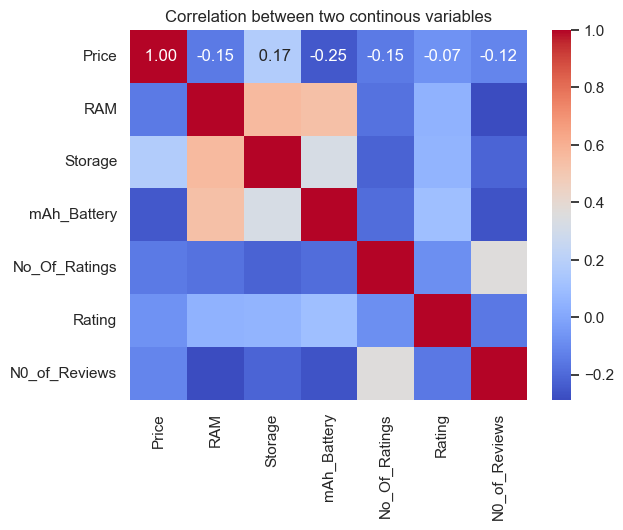

In [215]:
#continous + continous 

numerical_columns = ['Price','RAM','Storage','mAh_Battery','No_Of_Ratings','Rating','N0_of_Reviews']

corr = df2[numerical_columns].corr()

sns.heatmap(corr , annot = True, cmap = 'coolwarm',fmt=" .2f")
plt.title("Correlation between two continous variables")


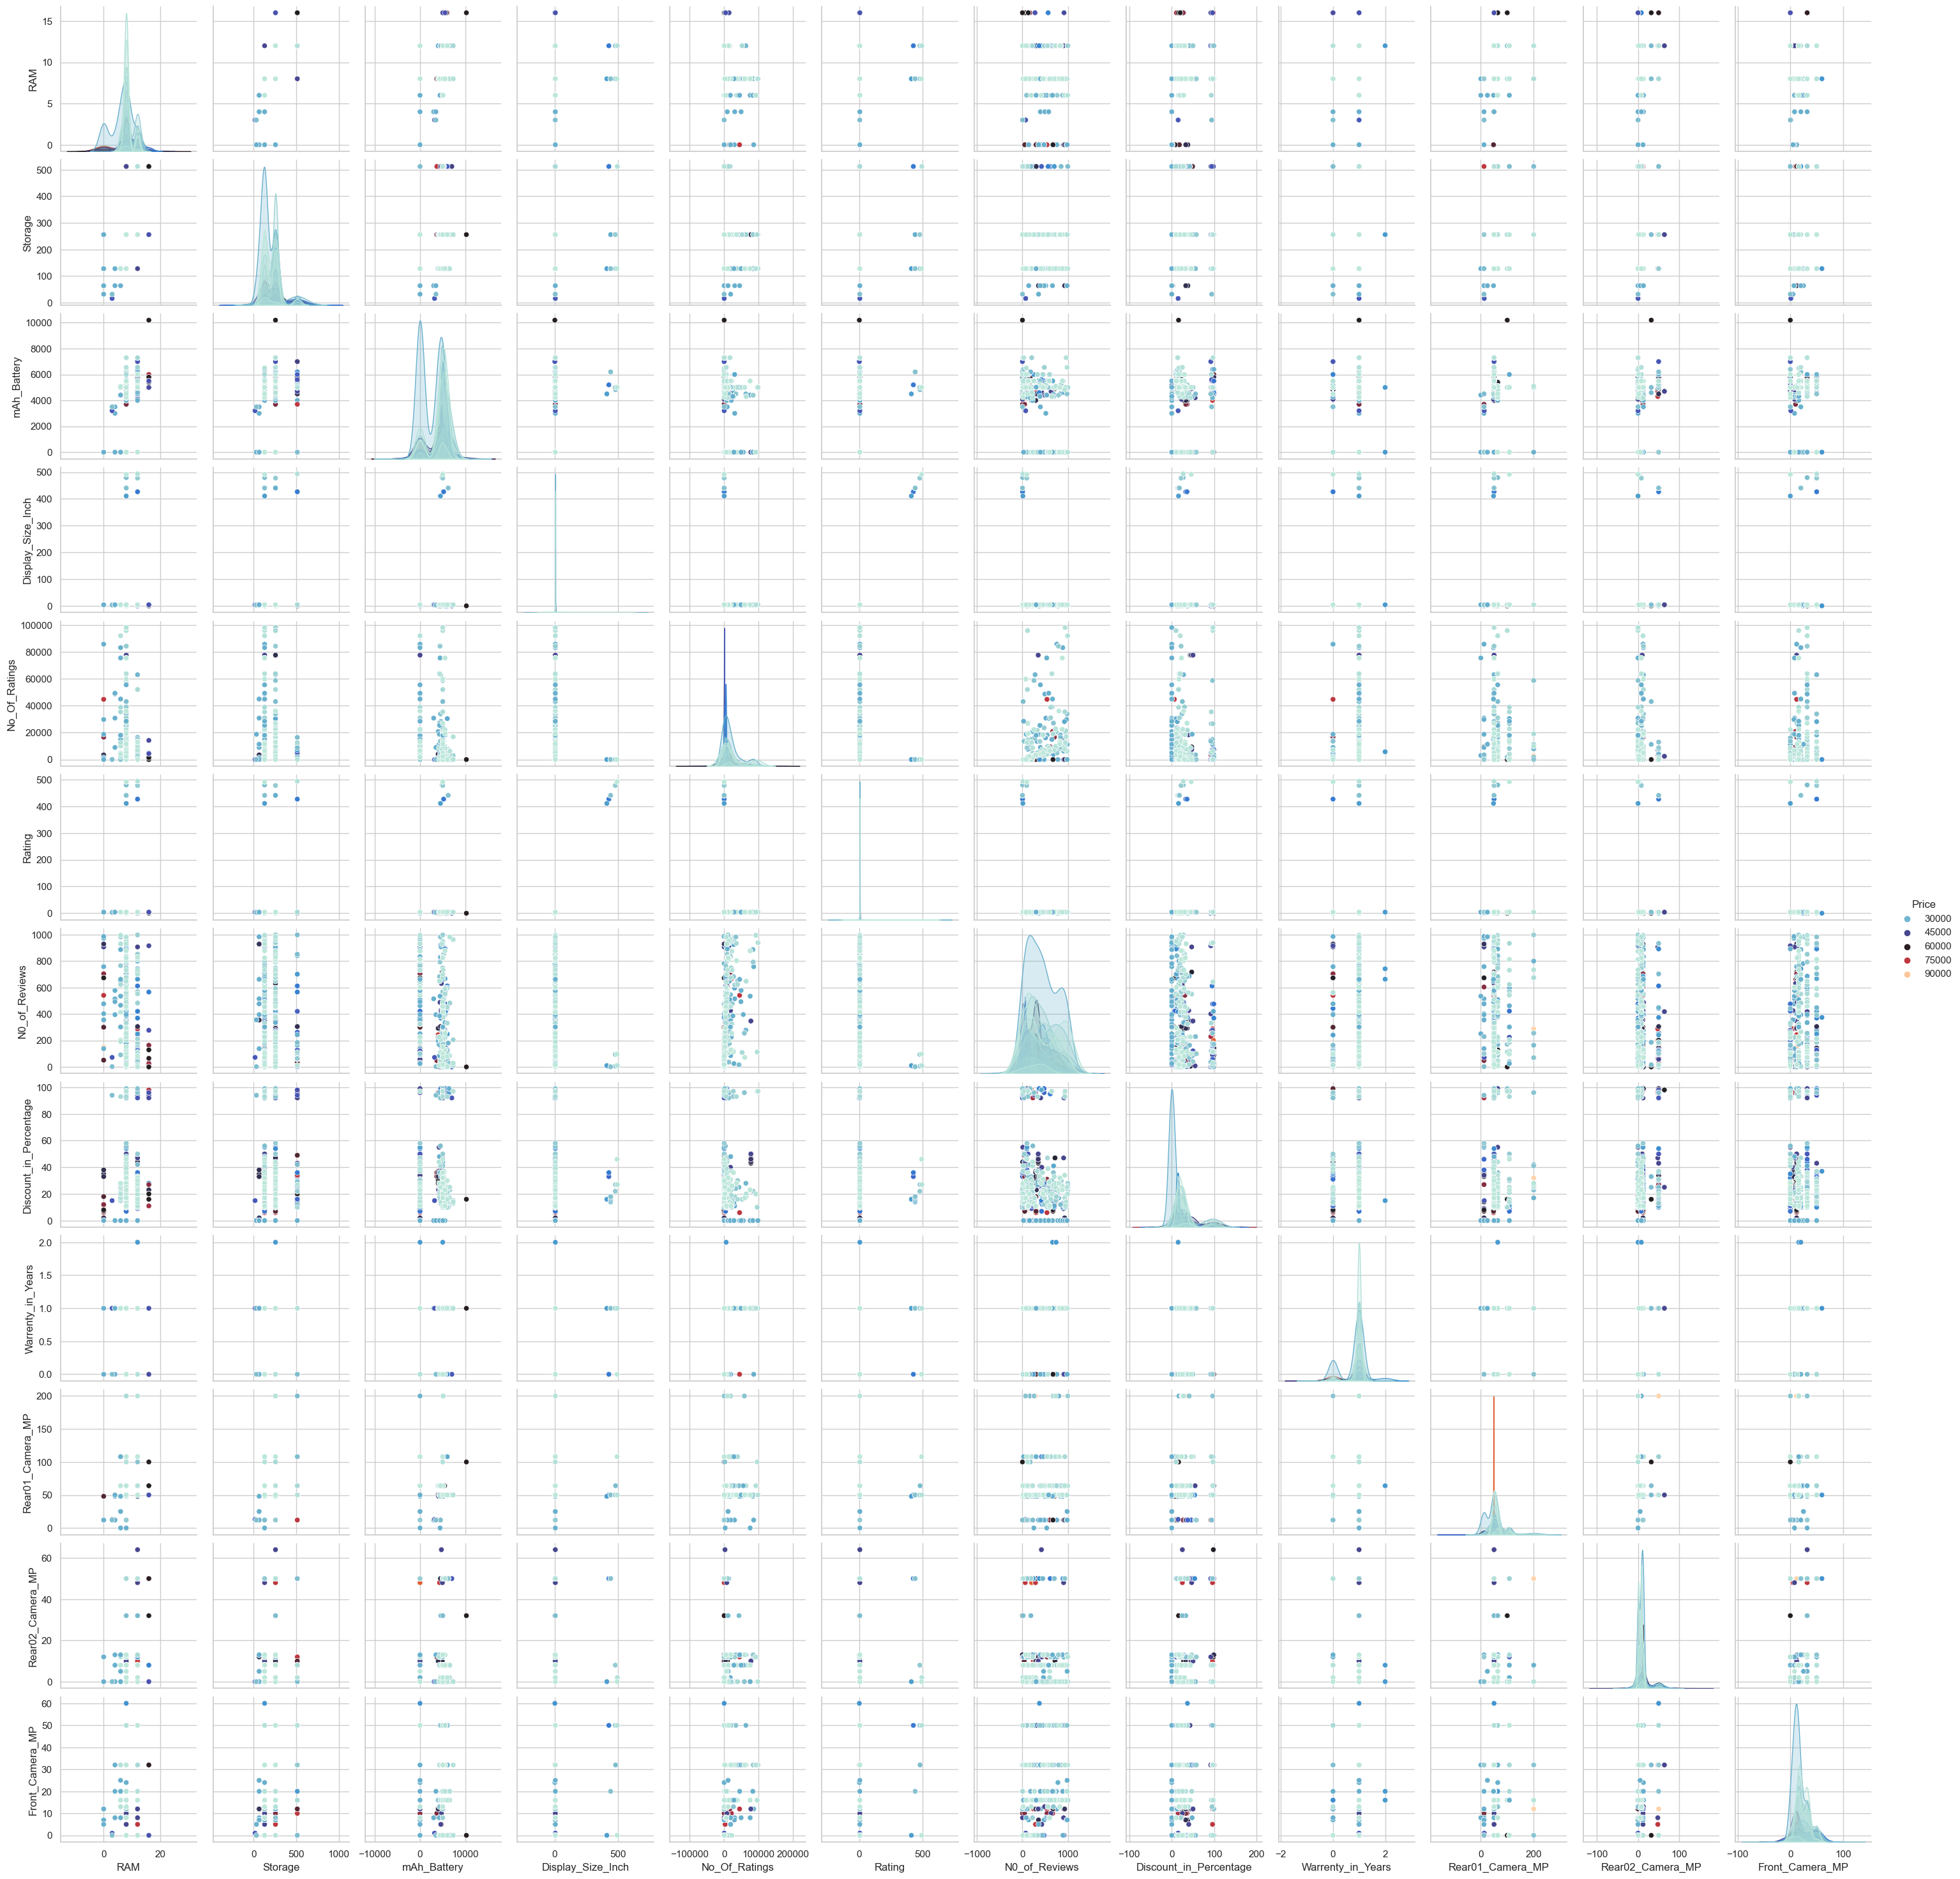

In [217]:
sns.pairplot(df2, hue = 'Price',palette = 'icefire')